In [226]:
# Imports
from PIL import Image
import numpy as np
import cv2
import math
from scipy.fft import dct
import matplotlib.pyplot as plt

## Compressing one 8x8 block

In [227]:
#convert image to grey scale
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [284]:
#getting an 8x8 block
init_x=50
init_y=100
block = np.array(im[init_x:init_x+8, init_y:init_y+8], dtype=float)-128

In [285]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [286]:
#define c function used in DCT
def c_funct(i):
    if i==0:
        return 1/(2**(1/2))
    else:
        return 1

In [287]:
def dct_matrix():
    result_matrix = np.zeros(shape=(8,8))
    sum = 0
    for i in range(8):
        for j in range(8):
            if i ==0:
                result_matrix[i,j] = np.sqrt(1/8)
            else:
                result_matrix[i,j] = np.sqrt(2/8)*math.cos(((2*j+1)*i*math.pi)/16)
    return result_matrix

In [288]:
np.round(dct_matrix(), 3)

array([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
       [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
       [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
       [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
       [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
       [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
       [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
       [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098]])

In [305]:
def dct_funct(block):
    return np.matrix(dct_matrix()) * np.matrix(block) * np.matrix(dct_matrix().transpose())

def idct_funct(block):
    return np.matrix(dct_matrix().transpose()) * np.matrix(block) * np.matrix(dct_matrix())

def round(block_val, q_mat_val):
    if block_val>0:
        return (block_val-np.floor(q_mat_val/2))/q_mat_val
    else:
        return (block_val+np.floor(q_mat_val/2))/q_mat_val

def quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = round(block[i,j], q_mat[i,j])
    
    return result_mat

def inv_quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = block[i,j]*q_mat[i,j]
    return result_mat

In [306]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [307]:
block

array([[22, 12,  6, 13, 20, 15,  5,  1],
       [15,  9,  2,  1,  3, 18, 43, 64],
       [ 6,  5,  7, 19, 39, 57, 66, 67],
       [15, 25, 42, 61, 79, 80, 57, 30],
       [47, 65, 75, 70, 63, 59, 48, 33],
       [72, 76, 64, 43, 39, 50, 49, 36],
       [60, 58, 40, 22, 31, 51, 45, 21],
       [30, 44, 40, 19, 16, 33, 35, 20]], dtype=uint8)

In [308]:
#quantization of block
quant_block = quantization(np.round(dct_funct(block)), quant_mat)


In [312]:
#inverse quantization
inv_quant_block = inv_quantization(quant_block, quant_mat)


In [313]:
inv_dct = idct_funct(inv_quant_block)

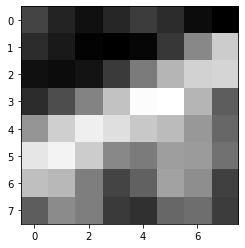

In [314]:
plt.imshow(block,cmap='gray')

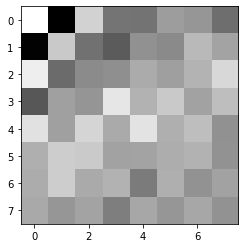

In [315]:
plt.imshow(inv_dct, cmap='gray')

## Compressing the entire image

In [316]:
# compressing the entire image
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_cropped = np.matrix(im[0:224, 0:224], dtype=float)-128

In [317]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

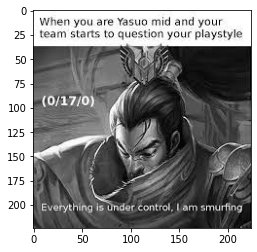

In [318]:
plt.imshow(im[0:224, 0:224], cmap='gray')

In [319]:
result = np.zeros(shape=(224,224))
for i in range(int(224/8)):
    for j in range(int(224/8)):
        block = im[i*8:(i+1)*8, j*8:(j+1)*8]
        dct = np.round(dct_funct(block),0)
        quant = np.round(quantization(dct, quant_mat))
        iquant = inv_quantization(quant, quant_mat)
        idct = idct_funct(iquant)
        result[i*8:(i+1)*8, j*8:(j+1)*8] = idct

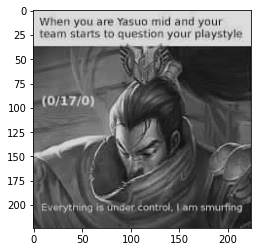

In [320]:
plt.imshow(result, cmap='gray')